In [1]:
%matplotlib inline
import PyPDF2

In [3]:
pdfFileObj = open('../data/supreme_court_example_arg.pdf', 'rb')

In [4]:
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

In [5]:
pdfReader.numPages

83

In [42]:
pagestr = pdfReader.getPage(3).extractText()

In [43]:
pagestr = pagestr.encode('utf8').decode('ascii','ignore').replace('\n','')

In [44]:
pagestr[pagestr.find('Official - Subject to Final Review')+35:-30]

u"P R O C E E D I N G S (10:05 a.m.) CHIEF JUSTICE ROBERTS: We'll hear argument first this morning in Case 16-1348, Currier versus Virginia. Mr. Fisher. ORAL ARGUMENT OF JEFFREY L. FISHER ON BEHALF OF THE PETITIONER MR. FISHER: Mr. Chief Justice, and may it please the Court: There's no dispute that if Virginia, like Nevada, required severance under the circumstances here, issue preclusion would be available with respect to the second trial. That much is dictated by Turner versus Arkansas. JUSTICE SOTOMAYOR: Doesn't it -MR. FISHER: So the only -JUSTICE SOTOMAYOR: Doesn't -- I'm sorry. Why do you say that? Meaning, what Nevada says is no severance, if both parties consent. So why isn't that exactly like Nevada? If you hadn't consented, severance would have been required, correct? MR. FISHER: So my understanding of "

In [45]:
pagestr.find('CHIEF JUSTICE')

735

In [46]:
docstring = ''
found_start = False
for pagenum in range(pdfReader.numPages):
    #get rid of newlines, unicode
    pagestr = pdfReader.getPage(pagenum).extractText().encode('utf8').decode('ascii','ignore').replace('\n','')
    if pagestr.find('CHIEF JUSTICE') != -1:
        found_start = True
    #clip off pagenums, header, footer
    if found_start:
        pagestr = pagestr[pagestr.find('Official - Subject to Final Review')+35:-30]
        docstring += pagestr

In [47]:
docstring

u'P R O C E E D I N G S (10:05 a.m.) CHIEF JUSTICE ROBERTS: We\'ll hear argument first this morning in Case 16-1348, Currier versus Virginia. Mr. Fisher. ORAL ARGUMENT OF JEFFREY L. FISHER ON BEHALF OF THE PETITIONER MR. FISHER: Mr. Chief Justice, and may it please the Court: There\'s no dispute that if Virginia, like Nevada, required severance under the circumstances here, issue preclusion would be available with respect to the second trial. That much is dictated by Turner versus Arkansas. JUSTICE SOTOMAYOR: Doesn\'t it -MR. FISHER: So the only -JUSTICE SOTOMAYOR: Doesn\'t -- I\'m sorry. Why do you say that? Meaning, what Nevada says is no severance, if both parties consent. So why isn\'t that exactly like Nevada? If you hadn\'t consented, severance would have been required, correct? MR. FISHER: So my understanding of Nevada law, and just I\'m -- without getting into the weeds of exactly what any particular other state law than Virginia requires, but all I\'m saying is state law requi

In [48]:
import nltk

In [49]:
nltk.word_tokenize(docstring)

[u'P',
 u'R',
 u'O',
 u'C',
 u'E',
 u'E',
 u'D',
 u'I',
 u'N',
 u'G',
 u'S',
 u'(',
 u'10:05',
 u'a.m.',
 u')',
 u'CHIEF',
 u'JUSTICE',
 u'ROBERTS',
 u':',
 u'We',
 u"'ll",
 u'hear',
 u'argument',
 u'first',
 u'this',
 u'morning',
 u'in',
 u'Case',
 u'16-1348',
 u',',
 u'Currier',
 u'versus',
 u'Virginia',
 u'.',
 u'Mr.',
 u'Fisher',
 u'.',
 u'ORAL',
 u'ARGUMENT',
 u'OF',
 u'JEFFREY',
 u'L.',
 u'FISHER',
 u'ON',
 u'BEHALF',
 u'OF',
 u'THE',
 u'PETITIONER',
 u'MR.',
 u'FISHER',
 u':',
 u'Mr.',
 u'Chief',
 u'Justice',
 u',',
 u'and',
 u'may',
 u'it',
 u'please',
 u'the',
 u'Court',
 u':',
 u'There',
 u"'s",
 u'no',
 u'dispute',
 u'that',
 u'if',
 u'Virginia',
 u',',
 u'like',
 u'Nevada',
 u',',
 u'required',
 u'severance',
 u'under',
 u'the',
 u'circumstances',
 u'here',
 u',',
 u'issue',
 u'preclusion',
 u'would',
 u'be',
 u'available',
 u'with',
 u'respect',
 u'to',
 u'the',
 u'second',
 u'trial',
 u'.',
 u'That',
 u'much',
 u'is',
 u'dictated',
 u'by',
 u'Turner',
 u'versus',
 u'Arkan

In [50]:
import pandas as pd

In [51]:
data = pd.read_csv('/Users/mbaumer/Downloads/SCDB_2017_01_justiceCentered_LegalProvision.csv')

In [52]:
data

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority,firstAgreement,secondAgreement
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-01,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,86,HHBurton,2.0,1.0,1.0,1.0,NaN,NaN
1,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-02,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,84,RHJackson,1.0,1.0,2.0,2.0,NaN,NaN
2,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-03,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,81,WODouglas,1.0,1.0,2.0,2.0,NaN,NaN
3,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-04,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,80,FFrankfurter,4.0,2.0,2.0,2.0,NaN,NaN
4,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-05,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,79,SFReed,1.0,1.0,2.0,2.0,NaN,NaN
5,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-06,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,78,HLBlack,1.0,2.0,2.0,2.0,NaN,NaN
6,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-07,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,85,WBRutledge,1.0,1.0,2.0,2.0,NaN,NaN
7,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-08,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,82,FMurphy,1.0,1.0,2.0,2.0,NaN,NaN
8,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-09,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,87,FMVinson,1.0,1.0,2.0,2.0,NaN,NaN
9,1946-002,1946-002-01,1946-002-01-01,1946-002-01-01-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,...,6,3,86,HHBurton,1.0,1.0,1.0,2.0,NaN,NaN


In [53]:
data.columns

Index([u'caseId', u'docketId', u'caseIssuesId', u'voteId', u'dateDecision',
       u'decisionType', u'usCite', u'sctCite', u'ledCite', u'lexisCite',
       u'term', u'naturalCourt', u'chief', u'docket', u'caseName',
       u'dateArgument', u'dateRearg', u'petitioner', u'petitionerState',
       u'respondent', u'respondentState', u'jurisdiction', u'adminAction',
       u'adminActionState', u'threeJudgeFdc', u'caseOrigin',
       u'caseOriginState', u'caseSource', u'caseSourceState',
       u'lcDisagreement', u'certReason', u'lcDisposition',
       u'lcDispositionDirection', u'declarationUncon', u'caseDisposition',
       u'caseDispositionUnusual', u'partyWinning', u'precedentAlteration',
       u'voteUnclear', u'issue', u'issueArea', u'decisionDirection',
       u'decisionDirectionDissent', u'authorityDecision1',
       u'authorityDecision2', u'lawType', u'lawSupp', u'lawMinor',
       u'majOpinWriter', u'majOpinAssigner', u'splitVote', u'majVotes',
       u'minVotes', u'justice', u'jus

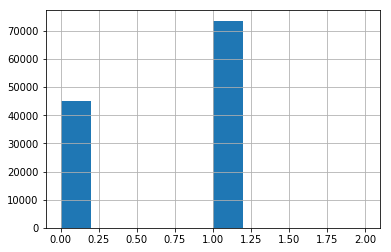

In [58]:
data['partyWinning'].hist()

In [61]:
data[data['docketId'] == 2015-14-114]

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority,firstAgreement,secondAgreement


In [2]:
import keras

/Users/mbaumer/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
import nltk

In [7]:
#import sys
#sys.path.insert(0, '/Users/mbaumer/side_projects/ruth-bader-ginsbot/python/')
import vocab

In [9]:
emb_matrix, word2id, id2word = vocab.get_glove('/Users/mbaumer/side_projects/ruth-bader-ginsbot/data/glove/glove.6B.50d.txt',50)

  2%|▏         | 8372/400000 [00:00<00:09, 41848.52it/s]

Loading GLoVE vectors from file: /Users/mbaumer/side_projects/ruth-bader-ginsbot/data/glove/glove.6B.50d.txt


100%|██████████| 400000/400000 [00:09<00:00, 42532.57it/s]


In [3]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=2,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
17473536/17464789 [==============================] - 3s 0us/step


KeyboardInterrupt: 